<img src="./Common/logo-MMU.png" style="height: 70px; width: 200px" align=left> 

# TCP2101

# Algorithm Analysis and Design Assignment 

### Team members

- 1191302794 --- Ahmad, Ayaan
- 1201303035 --- Salah Fayeq AlHaismawi
- 1211305402 --- Ahmed Sobhy Ramadan Ali Bakar
- 1211305294 --- Farazi Musaab Jashim


### The Jupyter Notebook contains the following visualization

- Co-ordinates in 3d format visualization
- Co-ordinates with Edges in 3d visualization
- Dijsktra' algorithm visualization 
- Kruskal's algorithm visualization

## Install Libraries

In [18]:
pip install networkx matplotlib

Note: you may need to restart the kernel to use updated packages.


### Import Libraries

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv

### Import Co-ordinates and Edges CSV Files

In [38]:
# Read edges from the CSV file
def read_edges(filename):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        edges = [tuple(row) for row in reader]
    return edges

# Read coordinates from the coordinates file
def read_coordinates(filename):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        coordinates = {row[0]: [float(x) for x in row[1:4]] for row in reader}
    return coordinates

# Your edge data file
edges_file = "./Dataset/DataSet2/edges.csv"
edges = read_edges(edges_file)

# Your coordinates data file
coordinates_file = "./Dataset/DataSet2/coordinates.csv"
coordinates = read_coordinates(coordinates_file)

### Co-ordinates in 3d format visualisation

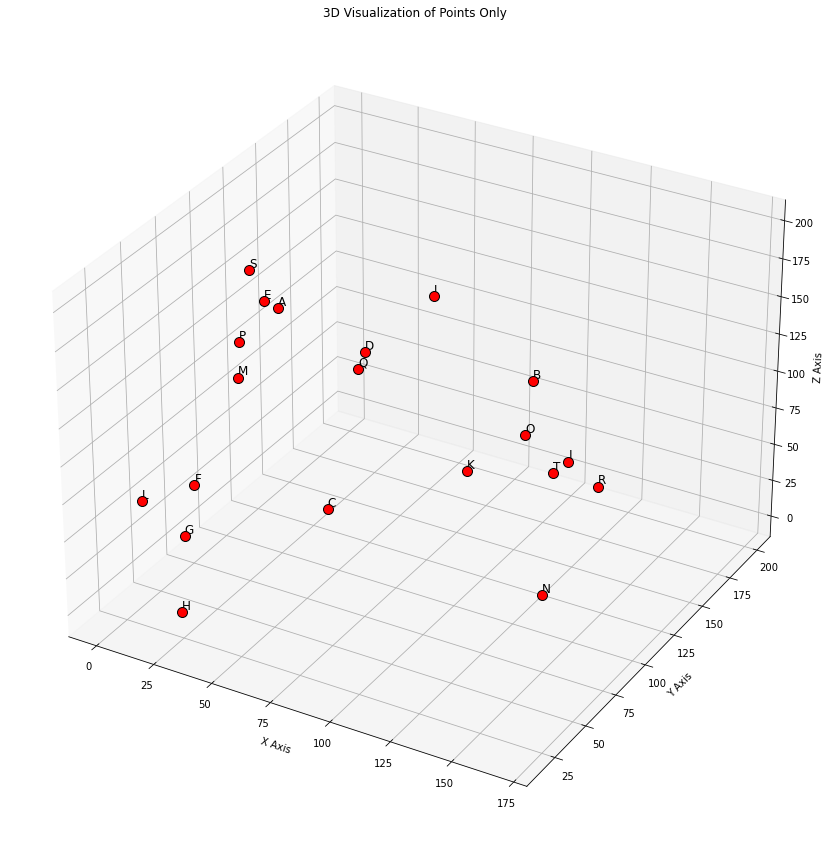

In [39]:
# Create a graph 
G = nx.Graph()

# Add nodes to the graph
for node, (x, y, z) in coordinates.items():
    G.add_node(node, pos=(x, y, z))

# Extract node positions
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph with points
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Draw larger nodes with labels
for node, (x, y, z) in pos.items():
    ax.scatter(x, y, z, s=100, color='red', edgecolors='black', alpha=1)
    ax.text(x, y, z, node, fontsize=12, ha='left', va='bottom')

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.title('3D Visualization of Points Only')
plt.show()


### Co-ordinates with Edges in 3d visualization

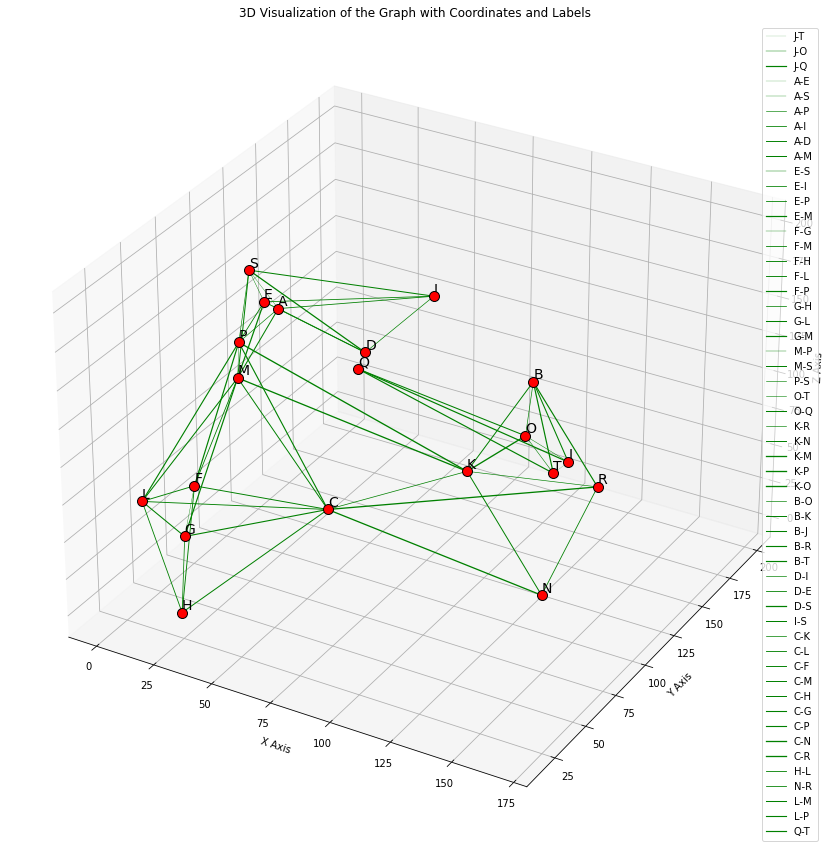

In [41]:
# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=float(edge[2]))

# Extract coordinates
coords = {node: coordinates[node] for node in G.nodes}

# Draw the graph
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

for edge in G.edges(data=True):
    start, end, weight = edge
    x, y, z = zip(*[coords[start], coords[end]])
    ax.plot(x, y, z, label=f'{start}-{end}', linewidth=weight['weight'] / 80, color='green')

# Draw larger nodes with labels
for node, (x, y, z) in coords.items():
    ax.scatter(x, y, z, s=100, color='red', edgecolors='black', alpha=1)
    ax.text(x, y, z, node, fontsize=14, ha='left', va='bottom')

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.legend()
plt.title('3D Visualization of the Graph with Coordinates and Labels')
plt.show()


### Dijsktra's algorithm visualization 

### Kruskal's algorithm visualization